C:\Users\HP\AppData\Local\Temp\ipykernel_8268\1201176475.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('1_Daily_minimum_temps.csv', parse_dates=['Date'], index_col='Date')


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Temp    3650 non-null   object
dtypes: object(1)
memory usage: 57.0+ KB
None


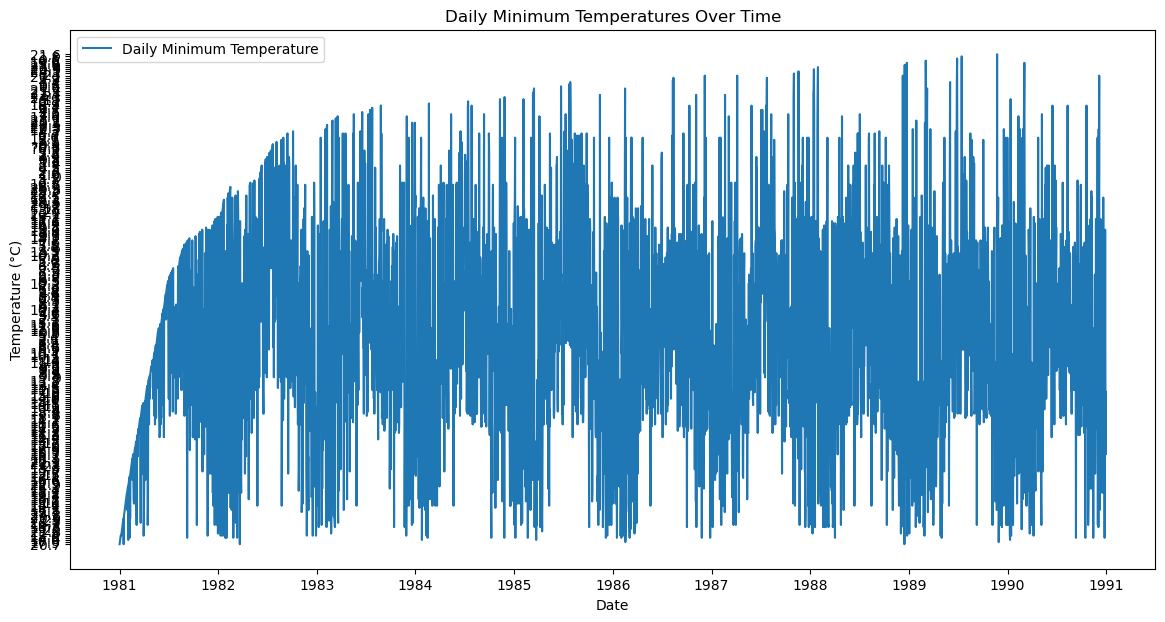

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset - update with correct column name if needed
data = pd.read_csv('1_Daily_minimum_temps.csv', parse_dates=['Date'], index_col='Date')

# Check the data structure to confirm columns and types
print(data.head())
print(data.info())  # Helps verify the 'Date' is indeed the index

# Plotting the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['Temp'], label='Daily Minimum Temperature')  # Ensure 'Temp' matches the column name in your dataset
plt.title('Daily Minimum Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert all non-numeric values to NaN and remove them
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# (Optional) Scaling the data if the model requires it
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

print("Data Preprocessing complete.")


Data Preprocessing complete.


In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Set ARIMA parameters manually (p=5, d=1, q=2 as an example)
p, d, q = 5, 1, 2
model = ARIMA(train, order=(p, d, q))
arima_result = model.fit()

# Make predictions and evaluate
predictions = arima_result.predict(start=len(train), end=len(data)-1, typ='levels')
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)

print(f'ARIMA MAE: {mae:.2f}, MSE: {mse:.2f}')


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA MAE: 4.32, MSE: 27.83


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA parameters (P=1, D=1, Q=1, s=12 for monthly seasonality)
model = SARIMAX(train, order=(p, d, q), seasonal_order=(1, 1, 1, 12))
sarima_result = model.fit()

# Prediction and evaluation
predictions_sarima = sarima_result.predict(start=len(train), end=len(data)-1, typ='levels')
mae_sarima = mean_absolute_error(test, predictions_sarima)
mse_sarima = mean_squared_error(test, predictions_sarima)

print(f'SARIMA MAE: {mae_sarima:.2f}, MSE: {mse_sarima:.2f}')


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA MAE: 4.09, MSE: 25.18


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [10]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/614.7 kB 393.8 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/614.7 kB 491.5 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/614.7 kB 595.3 kB/s eta 0:00:01
   ------ ------------------------------- 112.6/614.7 kB 595.3 kB/s eta 0:00:01
   ------ ------------------------------- 112.6/614.7 kB 595.3 kB/s eta 0:00:01
   --------- ---------------------------- 153.6/614.7 kB 459.5 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/614.7 kB 459.5 kB/s eta 0:00:02
   ---------- --------------------------- 163.8/614.7 kB 409.6 kB/s eta 0:00:02
   ------------ ------------------------- 194.6/614.7 kB 406.9 kB/s eta 0:00:02
   ------------------ ------------------- 297.0/614.7 kB 6


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from pmdarima import auto_arima

# Automatically select the best parameters for ARIMA/SARIMA
auto_arima_model = auto_arima(train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima_model.fit(train)

# Prediction and evaluation
predictions_auto_arima = auto_arima_model.predict(n_periods=len(test))
mae_auto_arima = mean_absolute_error(test, predictions_auto_arima)
mse_auto_arima = mean_squared_error(test, predictions_auto_arima)

print(f'Auto ARIMA MAE: {mae_auto_arima:.2f}, MSE: {mse_auto_arima:.2f}')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=7.09 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=16438.385, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=13892.264, Time=2.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=14593.564, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=22694.113, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=13906.010, Time=0.29 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=13886.878, Time=4.58 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=6.58 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=4.38 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=15279.124, Time=6.32 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=13880.012, Time=7.52 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=13881.900, Time=2.48 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=9.45 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.40 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept 

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMAX MAE: 4.32, MSE: 27.84


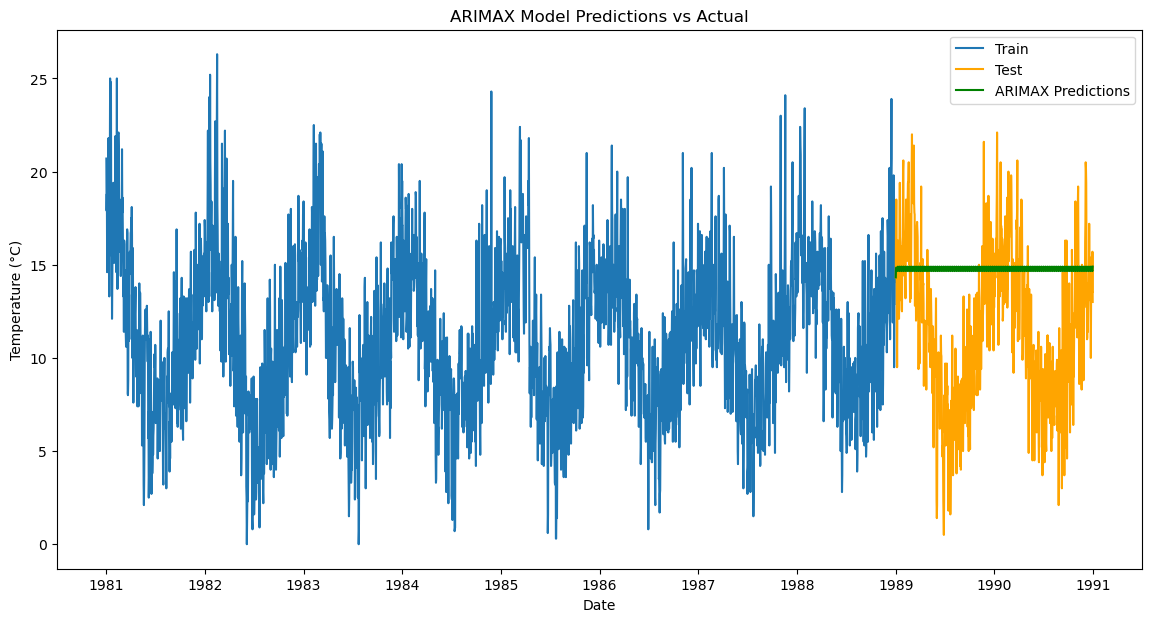

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'data' contains the time series data
# Generate an exogenous variable based on the day of the week
data['DayOfWeek'] = data.index.dayofweek  # Monday=0, Sunday=6

# Splitting data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Splitting exogenous variables for train and test
exog_train = train[['DayOfWeek']]
exog_test = test[['DayOfWeek']]

# Define the ARIMA order (p, d, q)
p, d, q = 5, 1, 2  # Example parameters, adjust based on your needs

# Fit ARIMAX model with exogenous variable
arimax_model = ARIMA(train['Temp'], order=(p, d, q), exog=exog_train)
arimax_result = arimax_model.fit()

# Forecast using the ARIMAX model and the test exogenous variable
arimax_predictions = arimax_result.predict(start=len(train), end=len(data)-1, exog=exog_test, typ='levels')

# Evaluate the model
mae_arimax = mean_absolute_error(test['Temp'], arimax_predictions)
mse_arimax = mean_squared_error(test['Temp'], arimax_predictions)
print(f'ARIMAX MAE: {mae_arimax:.2f}, MSE: {mse_arimax:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test', color='orange')
plt.plot(test.index, arimax_predictions, label='ARIMAX Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('ARIMAX Model Predictions vs Actual')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ETS MAE: 3.67, MSE: 20.22


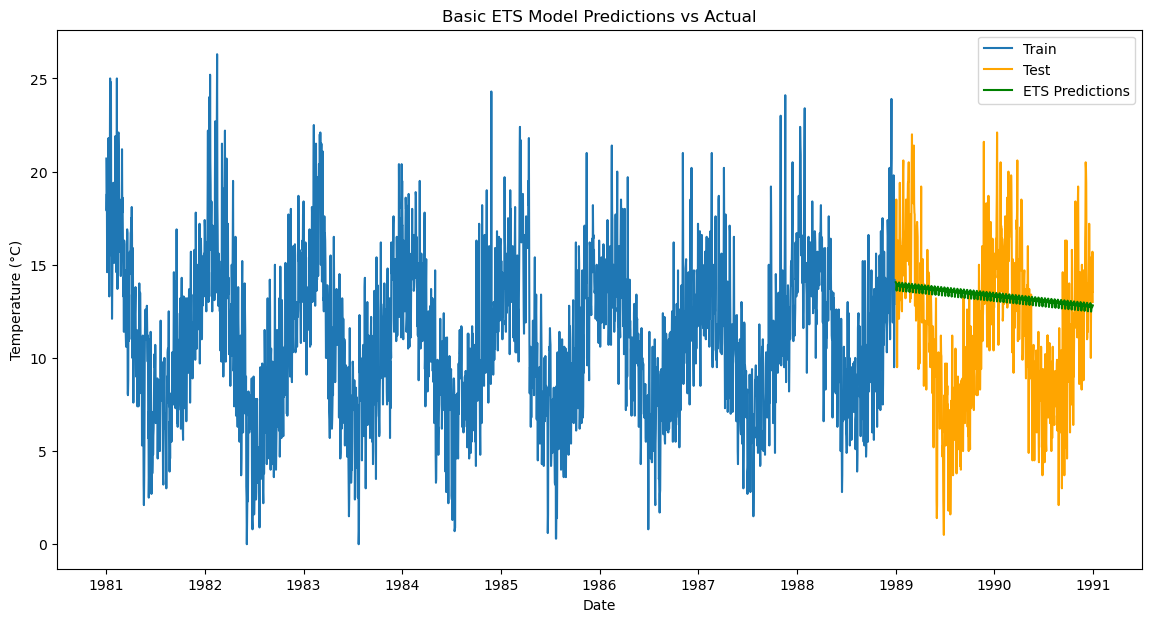

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Select only the temperature column (assuming 'Temp' is the column name)
train_series = train['Temp']
test_series = test['Temp']

# Implement ETS model with additive components (adjust as needed)
ets_model = ExponentialSmoothing(train_series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Prediction and evaluation
ets_predictions = ets_model.predict(start=len(train_series), end=len(train_series) + len(test_series) - 1)
mae_ets = mean_absolute_error(test_series, ets_predictions)
mse_ets = mean_squared_error(test_series, ets_predictions)

print(f'ETS MAE: {mae_ets:.2f}, MSE: {mse_ets:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train_series, label='Train')
plt.plot(test.index, test_series, label='Test', color='orange')
plt.plot(test.index, ets_predictions, label='ETS Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Basic ETS Model Predictions vs Actual')
plt.legend()
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Damped ETS MAE: 3.91, MSE: 22.89


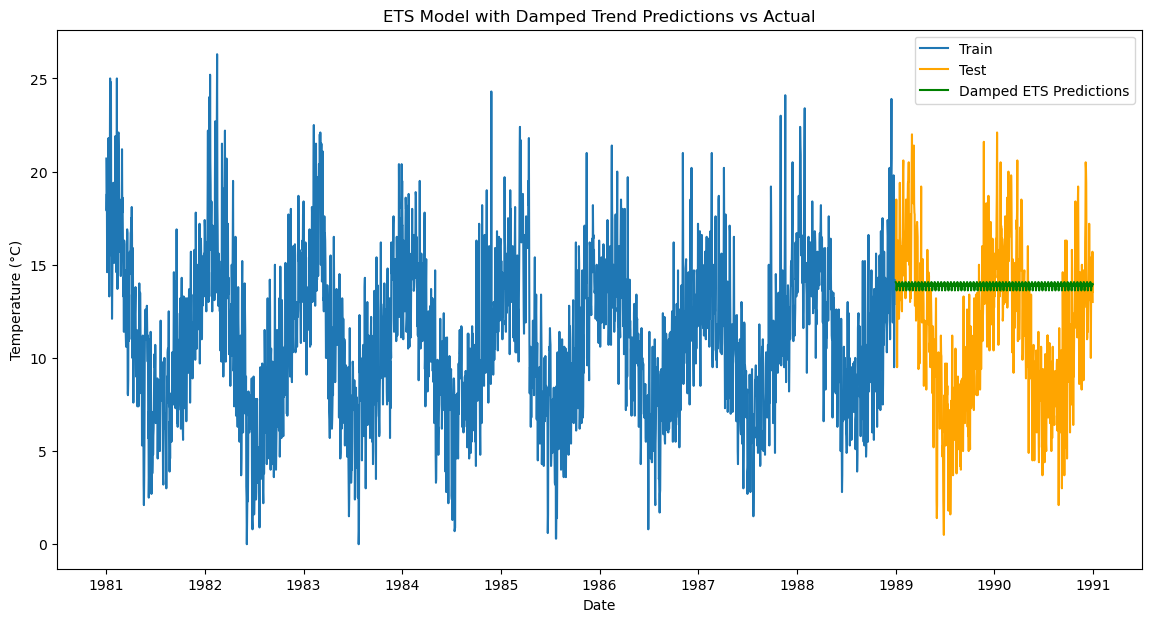

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Ensure we are only passing the temperature column as a one-dimensional series
train_series = train['Temp']
test_series = test['Temp']

# Apply ETS model with a damped trend
damped_ets_model = ExponentialSmoothing(train_series, trend='add', damped_trend=True, seasonal='add', seasonal_periods=12).fit()

# Prediction and evaluation
damped_ets_predictions = damped_ets_model.predict(start=len(train_series), end=len(train_series) + len(test_series) - 1)
mae_damped_ets = mean_absolute_error(test_series, damped_ets_predictions)
mse_damped_ets = mean_squared_error(test_series, damped_ets_predictions)

print(f'Damped ETS MAE: {mae_damped_ets:.2f}, MSE: {mse_damped_ets:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train_series, label='Train')
plt.plot(test.index, test_series, label='Test', color='orange')
plt.plot(test.index, damped_ets_predictions, label='Damped ETS Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('ETS Model with Damped Trend Predictions vs Actual')
plt.legend()
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Seasonal ETS MAE: 3.67, MSE: 20.22


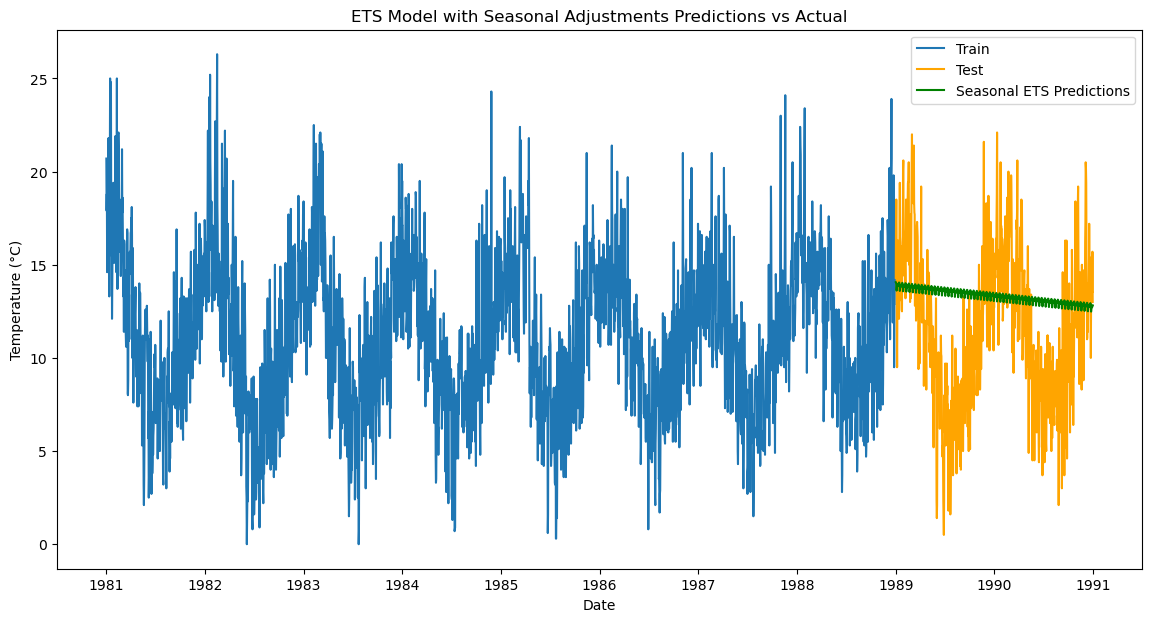

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming train and test are your training and testing datasets
# Ensure we are only passing the temperature column as a one-dimensional series
train_series = train['Temp']
test_series = test['Temp']

# Apply ETS model with seasonal adjustments
# You can choose 'add' or 'mul' for both trend and seasonal components depending on your data characteristics
seasonal_ets_model = ExponentialSmoothing(train_series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Prediction and evaluation
seasonal_ets_predictions = seasonal_ets_model.predict(start=len(train_series), end=len(train_series) + len(test_series) - 1)
mae_seasonal_ets = mean_absolute_error(test_series, seasonal_ets_predictions)
mse_seasonal_ets = mean_squared_error(test_series, seasonal_ets_predictions)

print(f'Seasonal ETS MAE: {mae_seasonal_ets:.2f}, MSE: {mse_seasonal_ets:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train_series, label='Train')
plt.plot(test.index, test_series, label='Test', color='orange')
plt.plot(test.index, seasonal_ets_predictions, label='Seasonal ETS Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('ETS Model with Seasonal Adjustments Predictions vs Actual')
plt.legend()
plt.show()
